<a href="https://colab.research.google.com/github/tadeu1808/tempo_compressor/blob/main/C%C3%B3pia_de_Tempo_Compressor_Ligado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataframe:
           Time  PRESSAO SUPRIME (psi)
0  17:12:54.211                    139
1  17:13:21.999                    137
2  17:14:44.847                    135
3  17:15:09.053                    133
4  17:15:34.976                    137

Column names:
Index(['Time', 'PRESSAO SUPRIME (psi)'], dtype='object')


/tmp/ipython-input-4114080149.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[time_column] = pd.to_datetime(df[time_column], errors='coerce')
/tmp/ipython-input-4114080149.py:53: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df[time_column] = df[time_column].dt.floor('S')


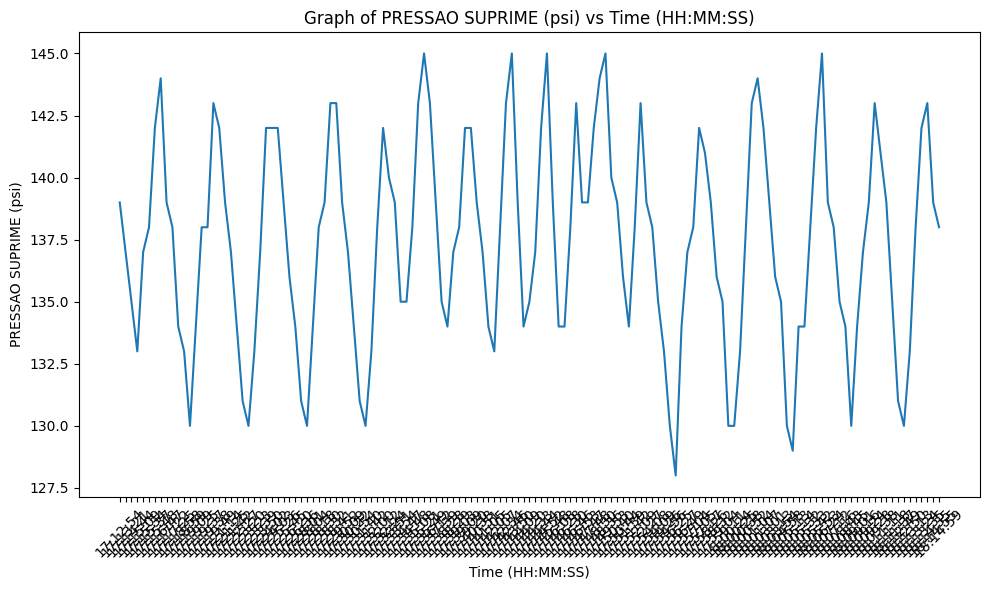

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Load the data from the xlsx file
file_path = '/tmp/I19_pressao_1H.xlsx'
try:
    df = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please make sure the file is in the correct location.")
    exit()

# Assuming the time column is named 'Time' and the data column is named 'Value'
# Adjust column names as per your file. Let's inspect the first few rows and columns to confirm.
print("First 5 rows of the dataframe:")
print(df.head())
print("\nColumn names:")
print(df.columns)

# Based on the typical structure of such data, let's assume the time column is the first one and the pressure data is in a subsequent column.
# You might need to adjust these based on the actual column names in your file.
time_column_candidate = df.columns[0] # Assuming the first column is time
# Let's look for a column that might contain pressure data. This is a heuristic and might need adjustment.
pressure_column_candidate = None
for col in df.columns:
    if 'pressao' in col.lower() or 'pressure' in col.lower() or 'value' in col.lower():
        pressure_column_candidate = col
        break

if pressure_column_candidate is None:
    print("Could not automatically identify a potential pressure/value column. Please manually specify the column name.")
    # As a fallback, let's just use the second column if it exists
    if len(df.columns) > 1:
        pressure_column_candidate = df.columns[1]
        print(f"Using the second column '{pressure_column_candidate}' as the value column.")
    else:
        print("Error: Not enough columns to identify a value column.")
        exit()


time_column = time_column_candidate
value_column = pressure_column_candidate


# Convert the time column to datetime objects, coercing errors
df[time_column] = pd.to_datetime(df[time_column], errors='coerce')

# Drop rows where time conversion failed
df.dropna(subset=[time_column], inplace=True)

# Remove decimal seconds from the time column
df[time_column] = df[time_column].dt.floor('S')

# Format the time column to show only HH:MM:ss
df['Time_Formatted'] = df[time_column].dt.strftime('%H:%M:%S')


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Time_Formatted'], df[value_column])
plt.xlabel('Time (HH:MM:SS)')
plt.ylabel(value_column) # Use the identified value column name for the label
plt.title(f'Graph of {value_column} vs Time (HH:MM:SS)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

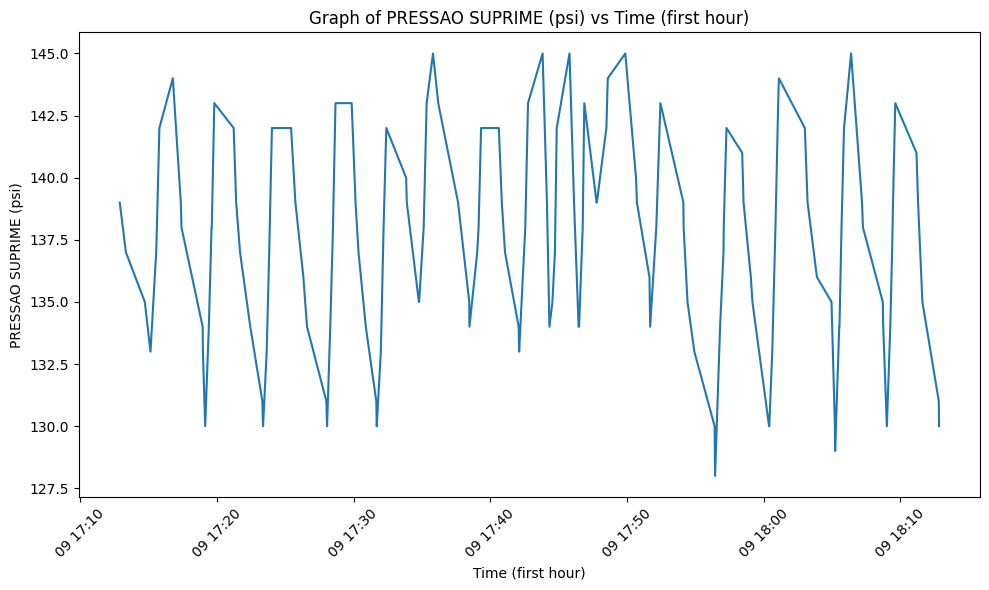

In [ ]:
# Ensure the 'Time' column is in datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Find the start time
start_time = df['Time'].min()

# Calculate the end time for the first hour
end_time = start_time + pd.Timedelta(hours=1)

# Filter the DataFrame for the first hour
df_first_hour = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

# Plot the data for the first hour
plt.figure(figsize=(10, 6))
plt.plot(df_first_hour['Time'], df_first_hour['PRESSAO SUPRIME (psi)'])
plt.xlabel('Time (first hour)')
plt.ylabel('PRESSAO SUPRIME (psi)')
plt.title('Graph of PRESSAO SUPRIME (psi) vs Time (first hour)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Maximum Peaks:


,Time,PRESSAO SUPRIME (psi),Time_Formatted
7,2025-08-09 17:16:47,144,17:16:47
16,2025-08-09 17:19:49,143,17:19:49
26,2025-08-09 17:24:03,142,17:24:03
36,2025-08-09 17:28:41,143,17:28:41
45,2025-08-09 17:32:24,142,17:32:24
53,2025-08-09 17:35:49,145,17:35:49
60,2025-08-09 17:39:20,142,17:39:20
69,2025-08-09 17:43:50,145,17:43:50
75,2025-08-09 17:45:48,145,17:45:48
80,2025-08-09 17:46:53,143,17:46:53



Minimum Peaks (Valleys):


,Time,PRESSAO SUPRIME (psi),Time_Formatted
3,2025-08-09 17:15:09,133,17:15:09
12,2025-08-09 17:19:09,130,17:19:09
22,2025-08-09 17:23:23,130,17:23:23
32,2025-08-09 17:28:04,130,17:28:04
42,2025-08-09 17:31:42,130,17:31:42
49,2025-08-09 17:34:47,135,17:34:47
57,2025-08-09 17:38:29,134,17:38:29
65,2025-08-09 17:42:07,133,17:42:07
71,2025-08-09 17:44:20,134,17:44:20
77,2025-08-09 17:46:28,134,17:46:28


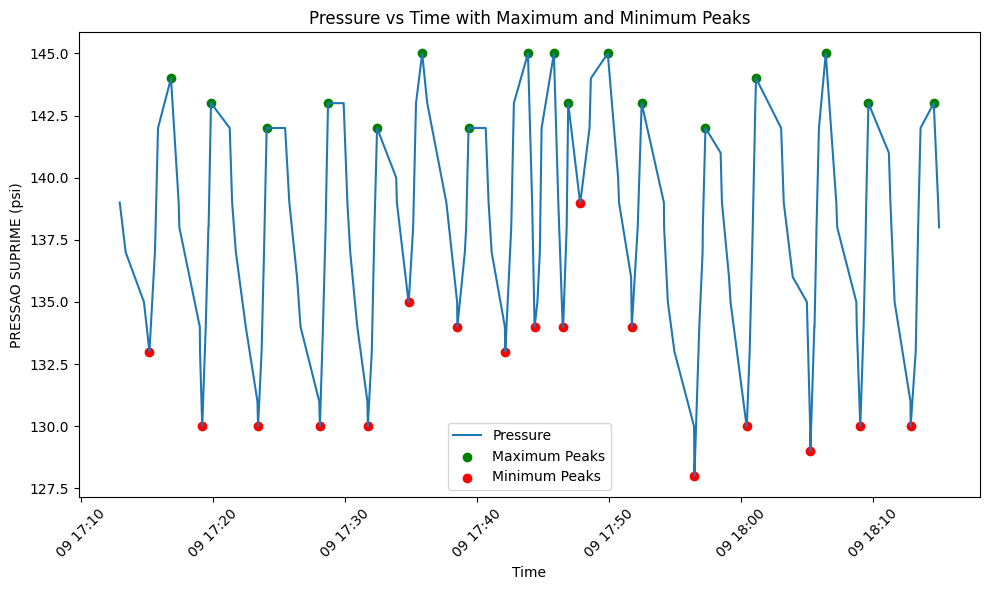

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is already loaded and 'Time' and 'PRESSAO SUPRIME (psi)' are the relevant columns

# Find indices of local maxima (peaks)
# Adjust 'distance' based on the expected minimum distance between peaks
peaks_indices, _ = find_peaks(df['PRESSAO SUPRIME (psi)'], distance=4) # Reduced distance

# Find indices of local minima (valleys)
# Invert the data to find minima using find_peaks
valleys_indices, _ = find_peaks(-df['PRESSAO SUPRIME (psi)'], distance=4) # Reduced distance

# Get the actual peak and valley points
peak_points = df.iloc[peaks_indices]
valley_points = df.iloc[valleys_indices]

print("Maximum Peaks:")
display(peak_points)

print("\nMinimum Peaks (Valleys):")
display(valley_points)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['PRESSAO SUPRIME (psi)'], label='Pressure')

# Plot the peaks and valleys
plt.scatter(peak_points['Time'], peak_points['PRESSAO SUPRIME (psi)'], color='green', label='Maximum Peaks')
plt.scatter(valley_points['Time'], valley_points['PRESSAO SUPRIME (psi)'], color='red', label='Minimum Peaks')
plt.xlabel('Time')
plt.ylabel('PRESSAO SUPRIME (psi)')
plt.title('Pressure vs Time with Maximum and Minimum Peaks')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Ensure peak and valley points DataFrames are sorted by time
peak_points = peak_points.sort_values(by='Time')
valley_points = valley_points.sort_values(by='Time')

# Initialize total time for min to max and max to min periods
total_time_min_to_max = pd.Timedelta(seconds=0)
total_time_max_to_min = pd.Timedelta(seconds=0)

# Calculate total time from minimum peak to next maximum peak
for index, valley_row in valley_points.iterrows():
    # Find the next peak after the current valley
    next_peak = peak_points[peak_points['Time'] > valley_row['Time']].iloc[:1]
    if not next_peak.empty:
        total_time_min_to_max += (next_peak['Time'].iloc[0] - valley_row['Time'])

# Calculate total time from maximum peak to next minimum peak
for index, peak_row in peak_points.iterrows():
    # Find the next valley after the current peak
    next_valley = valley_points[valley_points['Time'] > peak_row['Time']].iloc[:1]
    if not next_valley.empty:
        total_time_max_to_min += (next_valley['Time'].iloc[0] - peak_row['Time'])

# Calculate the total time duration of the graph
total_graph_time = df['Time'].max() - df['Time'].min()

print(f"Total time duration of the graph: {total_graph_time}")

print(f"Total time from minimum peak to next maximum peak: {total_time_min_to_max}")
print(f"Total time from maximum peak to next minimum peak: {total_time_max_to_min}")

Total time duration of the graph: 0 days 01:02:05
Total time from minimum peak to next maximum peak: 0 days 00:17:42
Total time from maximum peak to next minimum peak: 0 days 00:41:44


In [ ]:
# Count the number of transitions from minimum peak to maximum peak
# A transition occurs when a minimum peak is followed by a maximum peak
min_to_max_transitions = 0
# Ensure peak and valley points DataFrames are sorted by time
peak_points = peak_points.sort_values(by='Time')
valley_points = valley_points.sort_values(by='Time')

for index, valley_row in valley_points.iterrows():
    # Find the next peak after the current valley
    next_peak = peak_points[peak_points['Time'] > valley_row['Time']].iloc[:1]
    if not next_peak.empty:
        min_to_max_transitions += 1

# Count the number of transitions from maximum peak to minimum peak
# A transition occurs when a maximum peak is followed by a minimum peak
max_to_min_transitions = 0
for index, peak_row in peak_points.iterrows():
    # Find the next valley after the current peak
    next_valley = valley_points[valley_points['Time'] > peak_row['Time']].iloc[:1]
    if not next_valley.empty:
        max_to_min_transitions += 1


# Count the total number of maximum peaks
num_max_peaks = len(peak_points)

# Count the total number of minimum peaks
num_min_peaks = len(valley_points)

print(f"Number of transitions from minimum peak to maximum peak: {min_to_max_transitions}")
print(f"Number of transitions from maximum peak to minimum peak: {max_to_min_transitions}")
print(f"Total number of maximum peaks: {num_max_peaks}")
print(f"Total number of minimum peaks: {num_min_peaks}")

Number of transitions from minimum peak to maximum peak: 17
Number of transitions from maximum peak to minimum peak: 16
Total number of maximum peaks: 17
Total number of minimum peaks: 17


In [ ]:
# Ensure peak and valley points DataFrames are sorted by time
peak_points = peak_points.sort_values(by='Time')
valley_points = valley_points.sort_values(by='Time')

# Create a list to store the transition data
transition_data = []

# Iterate through the minimum peaks
for index, valley_row in valley_points.iterrows():
    # Find the next peak after the current valley
    next_peak = peak_points[peak_points['Time'] > valley_row['Time']].iloc[:1]

    if not next_peak.empty:
        # Get the pressure values at the valley and the next peak
        valley_pressure = valley_row['PRESSAO SUPRIME (psi)']
        peak_pressure = next_peak['PRESSAO SUPRIME (psi)'].iloc[0]

        # Calculate the pressure delta
        pressure_delta = peak_pressure - valley_pressure

        # Determine if the delta is positive or negative
        delta_type = "Positive" if pressure_delta > 0 else ("Negative" if pressure_delta < 0 else "Zero")

        # Calculate the time difference
        time_difference = next_peak['Time'].iloc[0] - valley_row['Time']

        # Append the data to the list
        transition_data.append({
            'Transition #': len(transition_data) + 1,
            'Start Time (Min Peak)': valley_row['Time'],
            'End Time (Max Peak)': next_peak['Time'].iloc[0],
            'Min Peak Pressure': valley_pressure, # Added min peak pressure
            'Max Peak Pressure': peak_pressure, # Added max peak pressure
            'Pressure Delta': pressure_delta,
            'Delta Type': delta_type,
            'Time Difference (Min to Max)': time_difference # Added time difference
        })


# Create a DataFrame from the transition data
transition_df = pd.DataFrame(transition_data)

# Format the time columns to show only HH:MM:ss
transition_df['Start Time (Min Peak)'] = transition_df['Start Time (Min Peak)'].dt.strftime('%H:%M:%S')
transition_df['End Time (Max Peak)'] = transition_df['End Time (Max Peak)'].dt.strftime('%H:%M:%S')

# Format the time difference column to show only minutes and seconds
transition_df['Time Difference (Min to Max)'] = transition_df['Time Difference (Min to Max)'].apply(lambda x: f'{x.seconds // 60:02}:{x.seconds % 60:02}')


# Display the table
print("Pressure Delta and Time Difference for Minimum to Maximum Peak Transitions:")
display(transition_df)

Pressure Delta and Time Difference for Minimum to Maximum Peak Transitions:


,Transition #,Start Time (Min Peak),End Time (Max Peak),Min Peak Pressure,Max Peak Pressure,Pressure Delta,Delta Type,Time Difference (Min to Max)
0,1,17:15:09,17:16:47,133,144,11,Positive,01:38
1,2,17:19:09,17:19:49,130,143,13,Positive,00:40
2,3,17:23:23,17:24:03,130,142,12,Positive,00:40
3,4,17:28:04,17:28:41,130,143,13,Positive,00:37
4,5,17:31:42,17:32:24,130,142,12,Positive,00:42
5,6,17:34:47,17:35:49,135,145,10,Positive,01:02
6,7,17:38:29,17:39:20,134,142,8,Positive,00:51
7,8,17:42:07,17:43:50,133,145,12,Positive,01:43
8,9,17:44:20,17:45:48,134,145,11,Positive,01:28
9,10,17:46:28,17:46:53,134,143,9,Positive,00:25


In [ ]:
# Ensure peak and valley points DataFrames are sorted by time
peak_points = peak_points.sort_values(by='Time')
valley_points = valley_points.sort_values(by='Time')

# Create a list to store the transition data for max to min
transition_data_max_to_min = []

# Iterate through the maximum peaks
for index, peak_row in peak_points.iterrows():
    # Find the next valley after the current peak
    next_valley = valley_points[valley_points['Time'] > peak_row['Time']].iloc[:1]

    if not next_valley.empty:
        # Get the pressure values at the peak and the next valley
        peak_pressure = peak_row['PRESSAO SUPRIME (psi)']
        valley_pressure = next_valley['PRESSAO SUPRIME (psi)'].iloc[0]

        # Calculate the pressure delta (should be negative for max to min)
        pressure_delta = valley_pressure - peak_pressure

        # Determine if the delta is positive or negative
        delta_type = "Positive" if pressure_delta > 0 else ("Negative" if pressure_delta < 0 else "Zero")

        # Calculate the time difference
        time_difference = next_valley['Time'].iloc[0] - peak_row['Time']

        # Append the data to the list
        transition_data_max_to_min.append({
            'Transition #': len(transition_data_max_to_min) + 1,
            'Start Time (Max Peak)': peak_row['Time'],
            'End Time (Min Peak)': next_valley['Time'].iloc[0],
            'Max Peak Pressure': peak_pressure, # Added max peak pressure
            'Min Peak Pressure': valley_pressure, # Added min peak pressure
            'Pressure Delta': pressure_delta,
            'Delta Type': delta_type,
            'Time Difference (Max to Min)': time_difference # Added time difference
        })

# Create a DataFrame from the transition data
transition_df_max_to_min = pd.DataFrame(transition_data_max_to_min)

# Format the time columns to show only HH:MM:ss
transition_df_max_to_min['Start Time (Max Peak)'] = transition_df_max_to_min['Start Time (Max Peak)'].dt.strftime('%H:%M:%S')
transition_df_max_to_min['End Time (Min Peak)'] = transition_df_max_to_min['End Time (Min Peak)'].dt.strftime('%H:%M:%S')

# Format the time difference column to show only minutes and seconds
transition_df_max_to_min['Time Difference (Max to Min)'] = transition_df_max_to_min['Time Difference (Max to Min)'].apply(lambda x: f'{x.seconds // 60:02}:{x.seconds % 60:02}')


# Display the table
print("Pressure Delta and Time Difference for Maximum to Minimum Peak Transitions:")
display(transition_df_max_to_min)

Pressure Delta and Time Difference for Maximum to Minimum Peak Transitions:


,Transition #,Start Time (Max Peak),End Time (Min Peak),Max Peak Pressure,Min Peak Pressure,Pressure Delta,Delta Type,Time Difference (Max to Min)
0,1,17:16:47,17:19:09,144,130,-14,Negative,02:22
1,2,17:19:49,17:23:23,143,130,-13,Negative,03:34
2,3,17:24:03,17:28:04,142,130,-12,Negative,04:01
3,4,17:28:41,17:31:42,143,130,-13,Negative,03:01
4,5,17:32:24,17:34:47,142,135,-7,Negative,02:23
5,6,17:35:49,17:38:29,145,134,-11,Negative,02:40
6,7,17:39:20,17:42:07,142,133,-9,Negative,02:47
7,8,17:43:50,17:44:20,145,134,-11,Negative,00:30
8,9,17:45:48,17:46:28,145,134,-11,Negative,00:40
9,10,17:46:53,17:47:47,143,139,-4,Negative,00:54


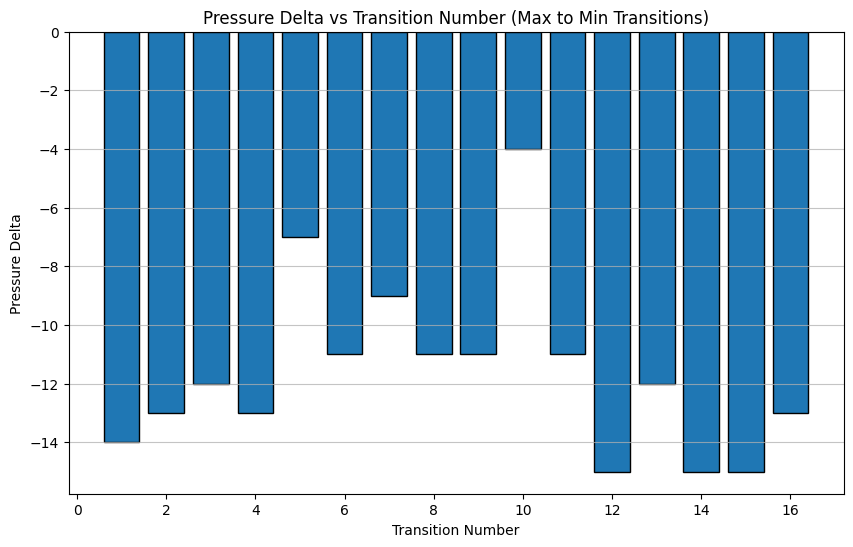

In [ ]:
import matplotlib.pyplot as plt

# Generate a bar chart of Pressure Delta vs Transition Number
plt.figure(figsize=(10, 6))
plt.bar(transition_df_max_to_min['Transition #'], transition_df_max_to_min['Pressure Delta'], edgecolor='black')
plt.xlabel('Transition Number')
plt.ylabel('Pressure Delta')
plt.title('Pressure Delta vs Transition Number (Max to Min Transitions)')
plt.grid(axis='y', alpha=0.75)
# Removed the line setting the lower y-limit to 0
plt.show()